In [33]:
# coding: utf-8

import numpy as np
from sklearn import datasets, linear_model
import pandas as pd
import matplotlib.pyplot as plt


# Load the diabetes data set.
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [34]:
# Use only one feature.
diabetes_X = diabetes_X[:, np.newaxis, 2]

In [35]:
# Create the linear-regression object.
regr_linear = linear_model.LinearRegression()
regr_Lasso = linear_model.Lasso(alpha=0.1)
regr_Ridge = linear_model.Ridge(alpha=0.1)

In [36]:
# Train the model using the training set.
regr_linear.fit(diabetes_X, diabetes_y)
regr_Lasso.fit(diabetes_X, diabetes_y)
regr_Ridge.fit(diabetes_X, diabetes_y);

In [37]:
# Get the resulting coefficients.
print("linear coefficients: \n", regr_linear.coef_)
print("linear intercept: \n", regr_linear.intercept_)
print("LASSO coefficients: \n", regr_Lasso.coef_)
print("LASSO intercept: \n", regr_Lasso.intercept_)
print("ridge coefficients: \n", regr_Ridge.coef_)
print("ridge intercept: \n", regr_Ridge.intercept_)

linear coefficients: 
 [949.43526038]
linear intercept: 
 152.13348416289617
LASSO coefficients: 
 [905.23526038]
LASSO intercept: 
 152.13348416289614
ridge coefficients: 
 [863.12296399]
ridge intercept: 
 152.13348416289614


In [38]:
# Get the coefficients and intercepts for plain old linear regression.
lin_coefficients = regr_linear.coef_
lin_intercept = regr_linear.intercept_

# Construct the equation string.
equation = f"y = {lin_intercept:.2f}"
for i, coef in enumerate(lin_coefficients):
    equation += f" + {coef:.2f} * x{i+1}"

print(equation)


# Get the coefficients and intercepts for LASSO-regularized linear regression.
las_coefficients = regr_Lasso.coef_
las_intercept = regr_Lasso.intercept_

# Construct the equation string.
equation = f"y = {las_intercept:.2f}"
for i, coef in enumerate(las_coefficients):
    equation += f" + {coef:.2f} * x{i+1}"

print(equation)


# Get the coefficients and intercepts for ridge-regularized linear regression.
rid_coefficients = regr_Ridge.coef_
rid_intercept = regr_Ridge.intercept_

# Construct the equation string.
equation = f"y = {rid_intercept:.2f}"
for i, coef in enumerate(rid_coefficients):
    equation += f" + {coef:.2f} * x{i+1}"

print(equation)

y = 152.13 + 949.44 * x1
y = 152.13 + 905.24 * x1
y = 152.13 + 863.12 * x1


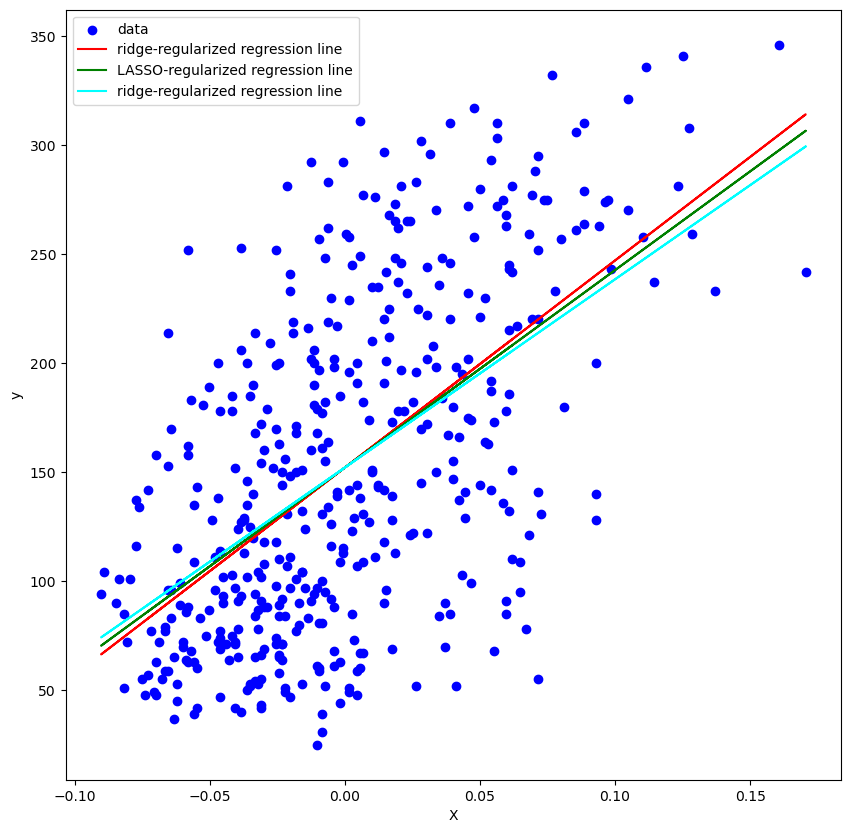

Linear Regression R-squared: 0.3439237602253802
Lasso Regression R-squared: 0.3431783831941495
Ridge Regression R-squared: 0.3410814150995507


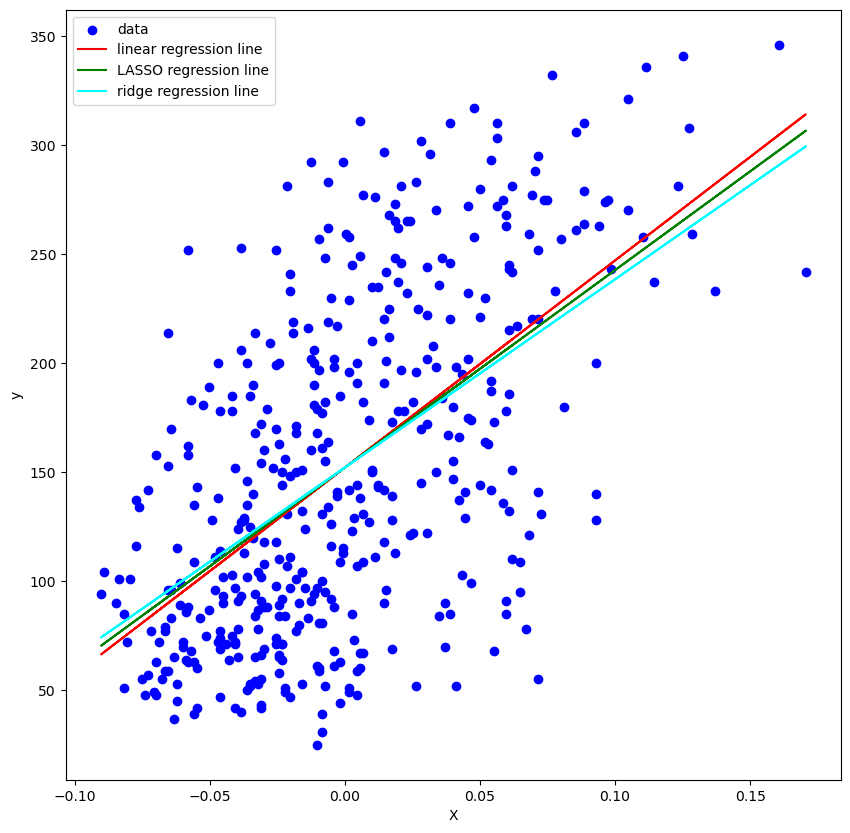

In [39]:

from sklearn.metrics import mean_squared_error, r2_score

y_pred = regr_linear.predict(diabetes_X)
y_L_pred = regr_Lasso.predict(diabetes_X)
y_r_pred = regr_Ridge.predict(diabetes_X)


plt.figure(figsize=(10, 10))  # 10" by 10"
plt.scatter(diabetes_X, diabetes_y, color='blue', label='data')
plt.plot(diabetes_X, y_pred, color='red', label='ridge-regularized regression line')
plt.plot(diabetes_X, y_L_pred, color='green', label='LASSO-regularized regression line')
plt.plot(diabetes_X, y_r_pred, color='cyan', label='ridge-regularized regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


# Generate predictions with each option.
y_pred = regr_linear.predict(diabetes_X)
y_L_pred = regr_Lasso.predict(diabetes_X)
y_r_pred = regr_Ridge.predict(diabetes_X)

# Calculate R-squared values
r2_linear = r2_score(diabetes_y, y_pred)
r2_lasso = r2_score(diabetes_y, y_L_pred)
r2_ridge = r2_score(diabetes_y, y_r_pred)

# Print R-squared values
print("Linear Regression R-squared:", r2_linear)
print("Lasso Regression R-squared:", r2_lasso)
print("Ridge Regression R-squared:", r2_ridge)

# Plot the data points and the regression line.
plt.figure(figsize=(10, 10))  # 10" by 10"
plt.scatter(diabetes_X, diabetes_y, color='blue', label='data')
plt.plot(diabetes_X, y_pred, color='red', label='linear regression line')
plt.plot(diabetes_X, y_L_pred, color='green', label='LASSO regression line')
plt.plot(diabetes_X, y_r_pred, color='cyan', label='ridge regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()




Explain how useful you think this model is. Explain your answer both in terms of the plot and in terms of the choices we made about the model complexity for purposes of this exercise.

### Hint:
In what way is the LASSO line more conservative than the unregularized-regression line? Similarly, how's the ridge line more conservative than the other two?

Answer 

The model are useful for explaining the difference in the dependent variable based on X2. The choice of model complexity (Linear vs. Lasso vs. Ridge) shows how regularization can impact model performance and prevent overfitting, even if the differences are subtle in this case. The plot helps visualize the fit and confirms that all three models provide similar predictions for this dataset.

Looking at the dataset the lasso splits the linear and the ridge line. (start in between both and end in between both) Thus the lasso takes a more conservative when comparing it to the linear and ridge. 

Looking at the dataset it does not seem like the ridge line is more conservative than the other two. 

Part 3.12

Linear Regression Coefficients: [986.50195362]
Linear Regression Intercept: 151.90842792563706
Ridge Regression Coefficients: [869.54408291]
Ridge Regression Intercept: 151.9636990862968
Linear Regression R-squared: 0.2791030139461089
Ridge Regression R-squared: 0.2872836243575573


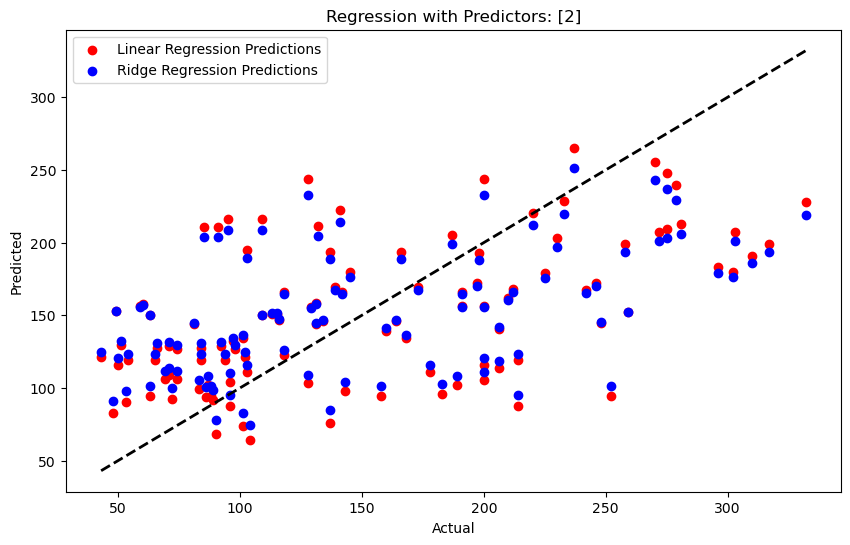

Linear Regression Coefficients: [773.29330077]
Linear Regression Intercept: 150.46426925450126
Ridge Regression Coefficients: [686.25567949]
Ridge Regression Intercept: 150.67928804443997
Linear Regression R-squared: 0.05478442469082401
Ridge Regression R-squared: 0.06884429509984091


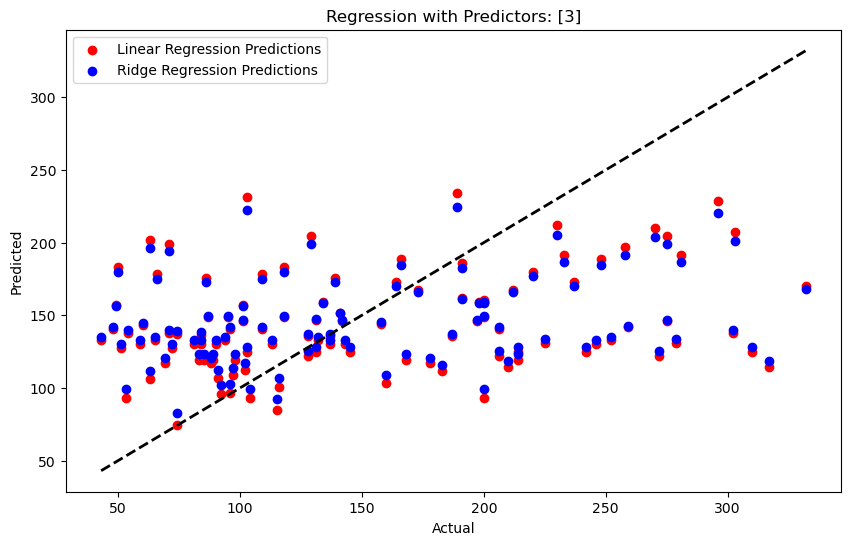

Linear Regression Coefficients: [792.96990744 455.83872732]
Linear Regression Intercept: 150.87377650014815
Ridge Regression Coefficients: [706.68530356 435.18693821]
Ridge Regression Intercept: 150.96557072456895
Linear Regression R-squared: 0.2762445647633972
Ridge Regression R-squared: 0.28284907636731327


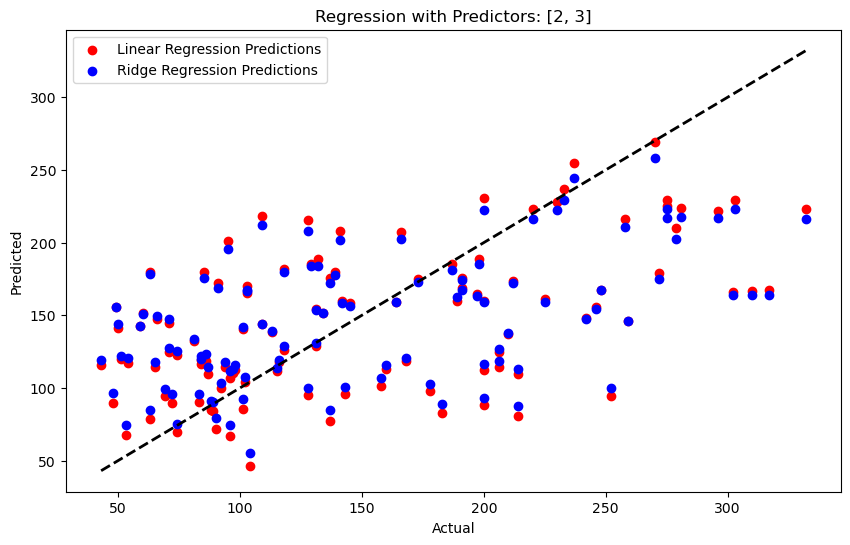

Linear Regression Coefficients: [778.23393231 441.55807064  83.25236336]
Linear Regression Intercept: 151.03314206323148
Ridge Regression Coefficients: [691.07169965 419.88998365  96.89846056]
Ridge Regression Intercept: 151.14705956078305
Linear Regression R-squared: 0.27137352685483296
Ridge Regression R-squared: 0.2766807361942768


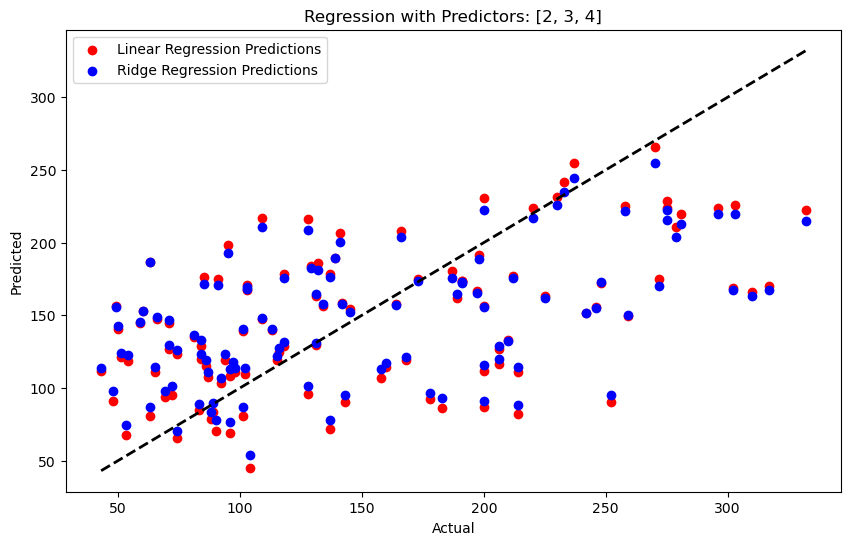

In [40]:
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(diabetes_X, diabetes_y)

def perform_regression(X_train, X_test, y_train, y_test, predictors):
    # Select the predictors
    X_train_selected = X_train[:, predictors]
    X_test_selected = X_test[:, predictors]
    
    regr_linear = linear_model.LinearRegression()
    regr_Ridge = linear_model.Ridge(alpha=0.1)
    
    regr_linear.fit(X_train_selected, y_train)
    regr_Ridge.fit(X_train_selected, y_train)
    
    print("Linear Regression Coefficients:", regr_linear.coef_)
    print("Linear Regression Intercept:", regr_linear.intercept_)
    print("Ridge Regression Coefficients:", regr_Ridge.coef_)
    print("Ridge Regression Intercept:", regr_Ridge.intercept_)
    
    y_pred_linear = regr_linear.predict(X_test_selected)
    y_pred_ridge = regr_Ridge.predict(X_test_selected)
    
   
    r2_linear = r2_score(y_test, y_pred_linear)
    r2_ridge = r2_score(y_test, y_pred_ridge)
    
    print("Linear Regression R-squared:", r2_linear)
    print("Ridge Regression R-squared:", r2_ridge)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred_linear, color='red', label='Linear Regression Predictions')
    plt.scatter(y_test, y_pred_ridge, color='blue', label='Ridge Regression Predictions')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.legend()
    plt.title(f'Regression with Predictors: {predictors}')
    plt.show()

# a. Only the best predictor 
perform_regression(X_train, X_test, y_train, y_test, [2])

# b. Only the second-best predictor 
perform_regression(X_train, X_test, y_train, y_test, [3])

# c. Both the best and second-best predictors 
perform_regression(X_train, X_test, y_train, y_test, [2, 3])

# d. All three predictors 
perform_regression(X_train, X_test, y_train, y_test, [2, 3, 4])


Part 3.13

a) Yes, due to the ridge regularization all cases the regularization slightly improved the model. Overall they are all affected very similarly with small improvements in r-squared. 

b) The r-squared values show how much of the dependent varibale can be predicted by the independent varibles. Overall the model with the best r-squared was only the best-predictor. Both the best and second, as well as all the predictors did well as well. However with only the second best predictor there was a noticible difference. 